### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

### Constants

In [2]:
TITANIC_CSV_DATA_URL = 'http://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Titanic.csv'

# Original column's names

INDEX_COL = 0
NAME_COL = 'Name'
SEX_COL = 'Sex'
PCLASS_COL = 'PClass'
AGE_COL = 'Age'
SURVIVED_COL = 'Survived'

# New column's names

AGE_GROUP_COL = 'AgeGroup'
SURVIVED_GROUP_COL = 'SurvivedGroup'

# Other constants

HEAD_ROWS_TO_SHOW = 15

###### Данные взяты из проекта kaggle. 

###### Датасет Титаник содержит данные пассажиров корабля. 

###### Цель — обработать данные, и сделать первоначальный анализ данных.

### Data load

In [3]:
data = pd.read_csv(TITANIC_CSV_DATA_URL)
data[:HEAD_ROWS_TO_SHOW]

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
5,6,"Anderson, Mr Harry",1st,47.00,male,1,0
6,7,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1,1
7,8,"Andrews, Mr Thomas, jr",1st,39.00,male,0,0
8,9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1,1
9,10,"Artagaveytia, Mr Ramon",1st,71.00,male,0,0


###### Делаем корректную выгрузку с номером по порядку.

In [4]:
data = pd.read_csv(TITANIC_CSV_DATA_URL, index_col = INDEX_COL)
data[:HEAD_ROWS_TO_SHOW]

,Name,PClass,Age,Sex,Survived,SexCode
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
6,"Anderson, Mr Harry",1st,47.00,male,1,0
7,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1,1
8,"Andrews, Mr Thomas, jr",1st,39.00,male,0,0
9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1,1
10,"Artagaveytia, Mr Ramon",1st,71.00,male,0,0


### Analyze of data types

In [5]:
data.dtypes

Name         object
PClass       object
Age         float64
Sex          object
Survived      int64
SexCode       int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313 entries, 1 to 1313
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1313 non-null   object 
 2   Age       756 non-null    float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
 5   SexCode   1313 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 71.8+ KB


###### Мы видим, что в колонке Age есть не заполненные значения по каким то причинам.

In [7]:
data.shape

(1313, 6)

### Categorical features

In [8]:
data.nunique()

Name        1310
PClass         4
Age           75
Sex            2
Survived       2
SexCode        2
dtype: int64

###### Чтобы определить категориальные признаки, я взглянул на количество уникальных значений в каждом столбце. Признаки «Sex» и «Survived» имеют два возможных значения, а «Pclass» имеет четыре возможных значения. «SexCode» дублирует «Sex».

##### SEX_COL

In [9]:
data[SEX_COL].value_counts()

male      851
female    462
Name: Sex, dtype: int64

###### Получаем диаграмму по мужчинам и женщинам на борту корабля.

<AxesSubplot:ylabel='Sex'>

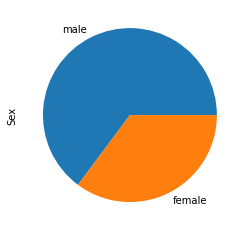

In [10]:
data[SEX_COL].value_counts().plot.pie()

###### Получаем процент женщин и мужчин.

In [11]:
mask = data[SEX_COL] == 'male'
one_percent_total = mask.count()/100
survived_yes = mask.sum()
print(round(survived_yes/one_percent_total,2))

64.81


In [12]:
mask = data[SEX_COL] == 'female'
one_percent_total = mask.count()/100
survived_yes = mask.sum()
print(round(survived_yes/one_percent_total,2))

35.19


##### SURVIVED_GROUP_COL

In [13]:
def SurvivedGroup( row ):
    """
    Функция отнесения выживших 'Yes' or 'No'
    """
    if not pd.isnull( row['Survived'] ):
        if row['Survived'] == 1:
            return 'Yes'


        if row['Survived'] == 0:
            return 'No'
  
    return '0'

In [14]:
data['SurvivedGroup'] = data.apply( SurvivedGroup, axis = 1 )

In [15]:
data[SURVIVED_GROUP_COL].value_counts()

No     863
Yes    450
Name: SurvivedGroup, dtype: int64

###### Получаем диаграмму по выжившим.

<AxesSubplot:ylabel='SurvivedGroup'>

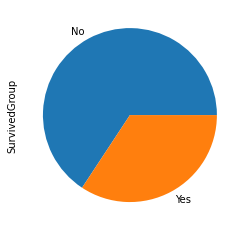

In [16]:
data[SURVIVED_GROUP_COL].value_counts().plot.pie()

###### Получаем процент выживших.

In [17]:
mask = data[SURVIVED_GROUP_COL] == 'Yes'
one_percent_total = mask.count()/100
survived_yes = mask.sum()
print(round(survived_yes/one_percent_total,2))

34.27


In [18]:
mask = data[SURVIVED_GROUP_COL] == 'No'
one_percent_total = mask.count()/100
survived_yes = mask.sum()
print(round(survived_yes/one_percent_total,2))

65.73


##### PCLASS_COL

In [19]:
data[PCLASS_COL].value_counts()

3rd    711
1st    322
2nd    279
*        1
Name: PClass, dtype: int64

###### Получаем диаграмму по распределению классов кают на корабле.

<AxesSubplot:ylabel='PClass'>

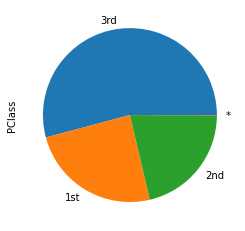

In [20]:
data[PCLASS_COL].value_counts().plot.pie()

###### Получаем процентное выражение по классам кают корабля.

In [21]:
mask = data[PCLASS_COL] == '1st'
one_percent_total = mask.count()/100
survived_yes = mask.sum()
print(round(survived_yes/one_percent_total,2))

24.52


In [22]:
mask = data[PCLASS_COL] == '2nd'
one_percent_total = mask.count()/100
survived_yes = mask.sum()
print(round(survived_yes/one_percent_total,2))

21.25


In [23]:
mask = data[PCLASS_COL] == '3rd'
one_percent_total = mask.count()/100
survived_yes = mask.sum()
print(round(survived_yes/one_percent_total,2))

54.15


### Quantitative features

###### Средний возраст пассажира.

In [24]:
data[AGE_COL].mean()

30.397989417989415

<AxesSubplot:ylabel='Frequency'>

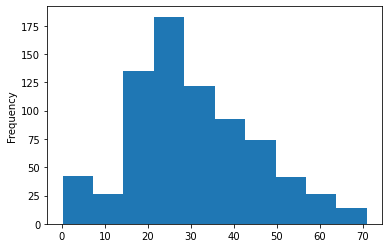

In [25]:
data[AGE_COL].plot(kind='hist')

###### Копируем значения колонки Age в AgeGroup и заменяем не заполненные значения на 0. 
###### Создаем 10 групп по возрастам.

In [26]:
data[AGE_GROUP_COL] = data[AGE_COL]
data[AGE_GROUP_COL].fillna(-1, inplace=True)
data[AGE_GROUP_COL] = data[AGE_GROUP_COL].map(lambda age: int(age // 10) +1)
data[:HEAD_ROWS_TO_SHOW]

,Name,PClass,Age,Sex,Survived,SexCode,SurvivedGroup,AgeGroup
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1,Yes,3
2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1,No,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0,No,4
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1,No,3
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0,Yes,1
6,"Anderson, Mr Harry",1st,47.00,male,1,0,Yes,5
7,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1,1,Yes,7
8,"Andrews, Mr Thomas, jr",1st,39.00,male,0,0,No,4
9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1,1,Yes,6
10,"Artagaveytia, Mr Ramon",1st,71.00,male,0,0,No,8


In [27]:
def AgeGroup( row ):
    """
    Функция распределения возраста
    """
    if not pd.isnull( row['AgeGroup'] ):
        if row['AgeGroup'] == 1:
            return '0-10 y.o.'
        if row['AgeGroup'] == 2:
            return '10-20 y.o.'
        if row['AgeGroup'] == 3:
            return '20-30 y.o.'
        if row['AgeGroup'] == 4:
            return '30-40 y.o.'
        if row['AgeGroup'] == 5:
            return '40-50 y.o.'
        if row['AgeGroup'] == 6:
            return '50-60 y.o.'
        if row['AgeGroup'] == 7:
            return '60-70 y.o.'
        if row['AgeGroup'] == 8:
            return '70-80 y.o.'
  
    return '0'

In [28]:
data['AgeGroup'] = data.apply( AgeGroup, axis = 1 )

In [29]:
data[AGE_GROUP_COL].value_counts()

0             557
20-30 y.o.    252
30-40 y.o.    168
40-50 y.o.    106
10-20 y.o.     96
50-60 y.o.     54
0-10 y.o.      53
60-70 y.o.     23
70-80 y.o.      4
Name: AgeGroup, dtype: int64

###### Диаграмма с неопределенными, нулевыми значениями по возрастам.

<AxesSubplot:ylabel='AgeGroup'>

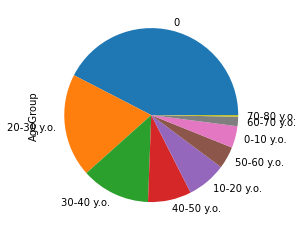

In [30]:
data[AGE_GROUP_COL].value_counts().plot.pie()

###### Диаграмма по возрастам без неопределенных значений.

<AxesSubplot:ylabel='AgeGroup'>

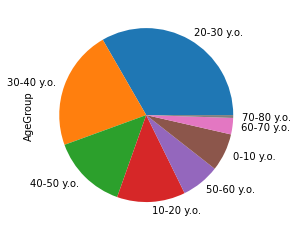

In [31]:
data[AGE_GROUP_COL].value_counts()[1:].plot.pie()

### Investigation of the correlation between to features 

###### Пересечение показателей возраста и выживших.

In [32]:
data[[AGE_GROUP_COL, SURVIVED_GROUP_COL]][:HEAD_ROWS_TO_SHOW]

,AgeGroup,SurvivedGroup
1,20-30 y.o.,Yes
2,0-10 y.o.,No
3,30-40 y.o.,No
4,20-30 y.o.,No
5,0-10 y.o.,Yes
6,40-50 y.o.,Yes
7,60-70 y.o.,Yes
8,30-40 y.o.,No
9,50-60 y.o.,Yes
10,70-80 y.o.,No


In [33]:
age_by_survived = data.groupby([AGE_GROUP_COL, SURVIVED_GROUP_COL])

In [34]:
age_by_survived.size()

AgeGroup    SurvivedGroup
0           No               420
            Yes              137
0-10 y.o.   No                16
            Yes               37
10-20 y.o.  No                52
            Yes               44
20-30 y.o.  No               168
            Yes               84
30-40 y.o.  No                98
            Yes               70
40-50 y.o.  No                63
            Yes               43
50-60 y.o.  No                28
            Yes               26
60-70 y.o.  No                14
            Yes                9
70-80 y.o.  No                 4
dtype: int64

In [35]:
age_by_survived = age_by_survived.size().unstack()
age_by_survived

SurvivedGroup,No,Yes
AgeGroup,,
0,420.0,137.0
0-10 y.o.,16.0,37.0
10-20 y.o.,52.0,44.0
20-30 y.o.,168.0,84.0
30-40 y.o.,98.0,70.0
40-50 y.o.,63.0,43.0
50-60 y.o.,28.0,26.0
60-70 y.o.,14.0,9.0
70-80 y.o.,4.0,NaN


<AxesSubplot:ylabel='AgeGroup'>

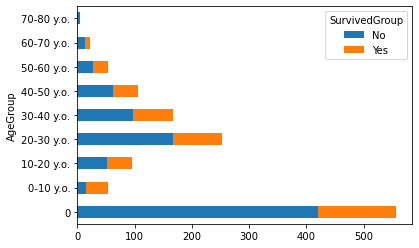

In [36]:
age_by_survived.fillna(0).plot(kind='barh', stacked=True)

###### Без нулевых, пропущенных значений.

In [37]:
age_by_survived_whithout_na = age_by_survived[1:].fillna(0)
age_by_survived_whithout_na

SurvivedGroup,No,Yes
AgeGroup,,
0-10 y.o.,16.0,37.0
10-20 y.o.,52.0,44.0
20-30 y.o.,168.0,84.0
30-40 y.o.,98.0,70.0
40-50 y.o.,63.0,43.0
50-60 y.o.,28.0,26.0
60-70 y.o.,14.0,9.0
70-80 y.o.,4.0,0.0


<AxesSubplot:ylabel='AgeGroup'>

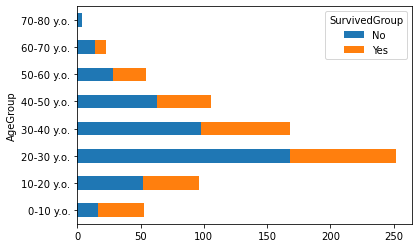

In [38]:
age_by_survived_whithout_na.fillna(0).plot(kind='barh', stacked=True)

###### Функция для выражения процентного соотношения.

In [39]:
def map_to_percent(r):
    return [float(v)/sum(r) for v in r]

age_by_survived_whithout_na.apply(map_to_percent, axis=1)

AgeGroup
0-10 y.o.      [0.3018867924528302, 0.6981132075471698]
10-20 y.o.     [0.5416666666666666, 0.4583333333333333]
20-30 y.o.     [0.6666666666666666, 0.3333333333333333]
30-40 y.o.     [0.5833333333333334, 0.4166666666666667]
40-50 y.o.     [0.5943396226415094, 0.4056603773584906]
50-60 y.o.    [0.5185185185185185, 0.48148148148148145]
60-70 y.o.      [0.6086956521739131, 0.391304347826087]
70-80 y.o.                                   [1.0, 0.0]
dtype: object

###### Пересечение показателей пола и выживших.

In [40]:
sex_by_survived = data.groupby([SEX_COL, SURVIVED_GROUP_COL])

In [41]:
sex_by_survived = sex_by_survived.size().unstack()
sex_by_survived

SurvivedGroup,No,Yes
Sex,,
female,154,308
male,709,142


<AxesSubplot:ylabel='Sex'>

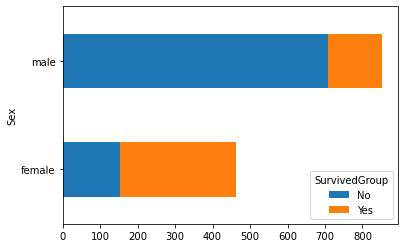

In [42]:
sex_by_survived.plot(kind='barh', stacked=True)

###### Функция для выражения процентного соотношения.

In [43]:
def map_to_percent(r):
    return [float(v)/sum(r) for v in r]

sex_by_survived.apply(map_to_percent, axis=1)

Sex
female     [0.3333333333333333, 0.6666666666666666]
male      [0.8331374853113983, 0.16686251468860164]
dtype: object

###### Пересечение показателей класса кают и выживших.

In [44]:
pclass_by_survived = data.groupby([PCLASS_COL, SURVIVED_GROUP_COL])

In [45]:
pclass_by_survived = pclass_by_survived.size().unstack()
pclass_by_survived

SurvivedGroup,No,Yes
PClass,,
*,1.0,NaN
1st,129.0,193.0
2nd,160.0,119.0
3rd,573.0,138.0


<AxesSubplot:ylabel='PClass'>

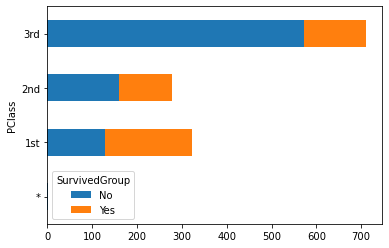

In [46]:
pclass_by_survived.plot(kind='barh', stacked=True)

###### Функция для выражения процентного соотношения.

In [47]:
def map_to_percent(r):
    return [float(v)/sum(r) for v in r]

pclass_by_survived.apply(map_to_percent, axis=1)

PClass
*                                     [nan, nan]
1st    [0.40062111801242234, 0.5993788819875776]
2nd     [0.5734767025089605, 0.4265232974910394]
3rd     [0.8059071729957806, 0.1940928270042194]
dtype: object

### Сводная таблица пол, класс, количество выживших.

In [48]:
pd.pivot_table( data, index = [SEX_COL, PCLASS_COL], columns = [SURVIVED_GROUP_COL], values = NAME_COL, aggfunc = np.size )

SurvivedGroup     No    Yes
Sex    PClass              
female 1st       9.0  134.0
       2nd      13.0   94.0
       3rd     132.0   80.0
male   *         1.0    NaN
       1st     120.0   59.0
       2nd     147.0   25.0
       3rd     441.0   58.0

### Сводная таблица пол, класс, средний возраст выживших.

In [49]:
pd.pivot_table( data, index = [SEX_COL, PCLASS_COL], columns = [SURVIVED_GROUP_COL], values = AGE_COL, aggfunc = np.mean )

SurvivedGroup         No        Yes
Sex    PClass                      
female 1st     35.200000  37.906250
       2nd     31.400000  26.853333
       3rd     22.821429  22.721087
male   1st     44.841463  34.253953
       2nd     31.698113  14.839524
       3rd     27.099620  22.088437

### Выводы из анализа данных.

###### Наибольший процент - 59 % составляют выжившие в 1 классе
###### Наименьший процент - 19 % составляют выжившие в 3 классе

###### Наибольший процент - 66 % составляют выжившие женщины
###### Наименьший процент - 16 % составляют выжившие мужчины

###### Больше всего выжило детей в своей группе 0 - 10 лет - 69%
###### Меньше всего выжило молодых людей в своей группе 20 - 30 лет - 33%

### Прогноз по сводной таблице
###### Женщина в возрасте 37 лет в среднем, в первом классе имеет шанс выжить в 93%
###### Мужчина в возрасте 27 лет в среднем, в третьем классе имеет шанс не выжить в 88%